In [1]:
#Import
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import shutil
import math
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



print(tf.__version__)

2.14.0


In [20]:
shutil.rmtree(r'/content/Dataset', ignore_errors=False, onerror=None)

In [21]:
#Unduh dataset
#!gdown 1_sUun9Yk5S74kIHtc3POpUlTZDOJvcxf
!gdown 18UVozJ7Rq5iMitqMmjVE74oGWDY6ehbp #7Class
#!gdown 1UU4gBE8foHQ64gCS2WjmGb2hJgHGdtVi #17Class

Downloading...
From: https://drive.google.com/uc?id=18UVozJ7Rq5iMitqMmjVE74oGWDY6ehbp
To: /content/Dataset_2.zip
100% 276M/276M [00:03<00:00, 84.0MB/s]


In [24]:
#Melakukan unzip/extract dataset
local_zip = '/content/Dataset_2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

#Menghapus file/folder yang tidak dibutuhkan
# shutil.rmtree(r'/content/dataset', ignore_errors=False, onerror=None)
os.remove('/content/Dataset_2.zip')
os.rename('/content/Original Dataset','/content/Dataset')

FileNotFoundError: ignored

In [26]:
#Menyiapkan Augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    # rotation_range=20,
                    # horizontal_flip=True,
                    # shear_range = 0.2,
                    # fill_mode = 'nearest'
                )

validation_datagen = ImageDataGenerator(
                    rescale=1./255
                )

In [27]:
#Melakukan persiapan data
train_dir = '/content/Dataset/train'
validation_dir = '/content/Dataset/valid'

train_generator =  train_datagen.flow_from_directory(
    train_dir, #Direktori
    target_size = (150,150), #Mengubah ukuran gambar
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    class_mode = 'categorical'
)

Found 13473 images belonging to 7 classes.
Found 3369 images belonging to 7 classes.


In [28]:
#Membangun CNN model

model = tf.keras.models.Sequential([
    # CNN  1
    tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Dropout(0.5),

    # CNN  2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Dropout(0.5),

    # CNN  3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Dropout(0.5),

    # CNN  4
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Dropout(0.5),

    # Flatten hasil CNN
    tf.keras.layers.Flatten(),

    # Hidden Layer
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Adding dropout after the first dense layer
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Adding dropout after the first dense layer
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Adding dropout after the second dense layer

    # Output Layer
    tf.keras.layers.Dense(7, activation='softmax') # 17 klasifikasi
    ])

In [29]:
#Melakukan compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
# Melakukan training model
history = model.fit(
            train_generator,
            epochs = 15,
            validation_steps=5,
            validation_data = validation_generator,
            verbose = 1
          )

Epoch 1/15
422/422 [==============================] - 28s 60ms/step - loss: 1.7998 - accuracy: 0.2302 - val_loss: 1.5606 - val_accuracy: 0.3562
Epoch 2/15
422/422 [==============================] - 29s 68ms/step - loss: 1.4683 - accuracy: 0.3982 - val_loss: 1.2499 - val_accuracy: 0.5312
Epoch 3/15
422/422 [==============================] - 27s 63ms/step - loss: 1.0947 - accuracy: 0.5976 - val_loss: 0.7273 - val_accuracy: 0.7250
Epoch 4/15
422/422 [==============================] - 24s 56ms/step - loss: 0.7329 - accuracy: 0.7540 - val_loss: 0.6146 - val_accuracy: 0.7812
Epoch 5/15
422/422 [==============================] - 21s 50ms/step - loss: 0.5353 - accuracy: 0.8225 - val_loss: 0.3616 - val_accuracy: 0.9000
Epoch 6/15
422/422 [==============================] - 23s 53ms/step - loss: 0.4788 - accuracy: 0.8452 - val_loss: 0.2540 - val_accuracy: 0.9125
Epoch 7/15
422/422 [==============================] - 22s 52ms/step - loss: 0.3662 - accuracy: 0.8839 - val_loss: 0.4418 - val_accuracy:

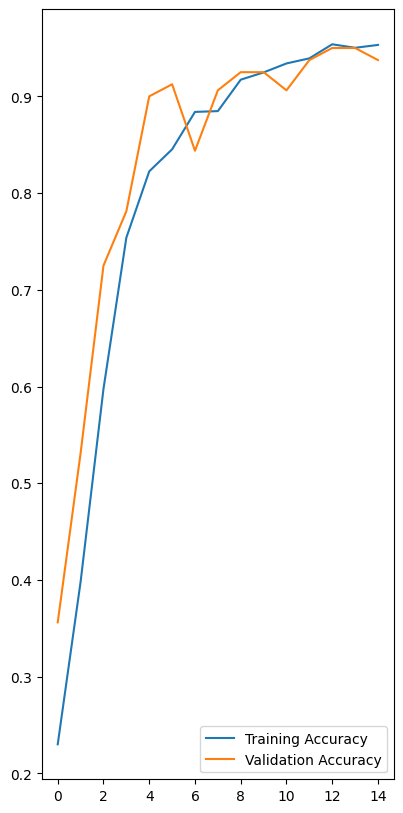

In [31]:
#Membuat grafik akurasi
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')

In [33]:
model.save('model_2_pohon.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
#Prediction images
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255)
  test = datagen.flow(images)

  classes = model.predict(test, batch_size=10)
  predictions_arr = np.array(np.argmax(classes))
  # Hasil klasifikasi model terhadap gambar
  print(classes)
  print(predictions_arr)
  pred = ['Apple Scab','Apple Black Rot','Apple Cedar/Apple Rust','Apple Healthy','Potato Early blight','Potato healthy','Potato___Late_blight']
  print(pred[predictions_arr])

In [42]:
#Download test image
!gdown 1cQFeo1SCnzrDkdRKF4Gwe1-OqpQP1SFO

#Melakukan unzip/extract dataset
local_zip = '/content/Test Image.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

#Menghapus file/folder yang tidak dibutuhkan
os.remove('/content/Test Image.zip')

Downloading...
From: https://drive.google.com/uc?id=1cQFeo1SCnzrDkdRKF4Gwe1-OqpQP1SFO
To: /content/Test Image.zip
100% 227k/227k [00:00<00:00, 153MB/s]


In [52]:
# Prediction images
path = "Test Image/"
predictions_array = []
pred = ['Apple Scab','Apple Black Rot','Apple Cedar/Apple Rust','Apple Healthy','Potato Early blight','Potato Late_blight','Potato healthy']

# Iterate through all files in the specified directory
for filename in os.listdir(path):
    if filename.endswith(".JPG") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Full path to the image file
        img_path = os.path.join(path, filename)

        # Predicting images
        img = image.load_img(img_path, target_size=(150, 150))

        #imgplot = plt.imshow(img)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
        test = datagen.flow(images)

        classes = model.predict(test, batch_size=10,verbose=0)
        predictions_arr = np.argmax(classes)
        predictions_array.append(predictions_arr)

        # Display the result for each image
        print(f"Prediction for {filename}: {pred[predictions_arr]}")

# Display the predictions array for all images
print("Predictions Array:", predictions_array)
print(img)
print(img_path)

Prediction for Apple Cedar Apple Rust.JPG: Apple Cedar/Apple Rust
Prediction for Potato Early Blight.JPG: Potato Early blight
Prediction for Potato Healthy_3.JPG: Potato healthy
Prediction for Apple Scab.JPG: Apple Scab
Prediction for Apple Healthy.JPG: Apple Healthy
Prediction for Potato Late Blight_2.JPG: Potato Late_blight
Prediction for Apple Healthy_2.JPG: Apple Healthy
Prediction for Apple Black Rot.JPG: Apple Black Rot
Prediction for Potato Late Blight_3.JPG: Potato Late_blight
Prediction for Potato Late Blight.JPG: Potato Late_blight
Prediction for Potato Healthy_2.JPG: Potato healthy
Prediction for Potato Healthy.JPG: Potato healthy
Prediction for Apple Scab_2.JPG: Apple Scab
Predictions Array: [2, 4, 6, 0, 3, 5, 3, 1, 5, 5, 6, 6, 0]
<PIL.Image.Image image mode=RGB size=150x150 at 0x795FA6940760>
Test Image/Apple Scab_2.JPG


# **TEST PREDICT LEWAT LOAD MODEL**

In [48]:
from tensorflow.keras.models import load_model
model2 = load_model('/content/model_2_pohon.h5')

# Prediction images
path = "Test Image/"
predictions_array = []
pred = ['Apple Scab','Apple Black Rot','Apple Cedar/Apple Rust','Apple Healthy','Potato Early blight','Potato Late_blight','Potato healthy']

# Iterate through all files in the specified directory
for filename in os.listdir(path):
    if filename.endswith(".JPG") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Full path to the image file
        img_path = os.path.join(path, filename)

        # Predicting images
        img = image.load_img(img_path, target_size=(150, 150))

        #imgplot = plt.imshow(img)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
        test = datagen.flow(images)

        classes = model2.predict(test, batch_size=10,verbose=0)
        predictions_arr = np.argmax(classes)
        predictions_array.append(predictions_arr)

        # Display the result for each image
        print(f"Prediction for {filename}: {pred[predictions_arr]}")

# Display the predictions array for all images
print("Predictions Array:", predictions_array)

Prediction for Apple Cedar Apple Rust.JPG: Apple Cedar/Apple Rust
Prediction for Potato Early Blight.JPG: Potato Early blight
Prediction for Potato Healthy_3.JPG: Potato healthy
Prediction for Apple Scab.JPG: Apple Scab
Prediction for Apple Healthy.JPG: Apple Healthy
Prediction for Potato Late Blight_2.JPG: Potato Late_blight
Prediction for Apple Healthy_2.JPG: Apple Healthy
Prediction for Apple Black Rot.JPG: Apple Black Rot
Prediction for Potato Late Blight_3.JPG: Potato Late_blight
Prediction for Potato Late Blight.JPG: Potato Late_blight
Prediction for Potato Healthy_2.JPG: Potato healthy
Prediction for Potato Healthy.JPG: Potato healthy
Prediction for Apple Scab_2.JPG: Apple Scab
Predictions Array: [2, 4, 6, 0, 3, 5, 3, 1, 5, 5, 6, 6, 0]
